In [1]:
%config IPCompleter.use_jedi = False
%pdb off
%load_ext autoreload
%autoreload 3

# required to enable non-blocking interaction:
%gui qt5

# Pho's Formatting Preferences
import builtins

import IPython
from IPython.core.formatters import PlainTextFormatter
from IPython import get_ipython
from pyphocorehelpers.gui.Jupyter.AsyncExecutionHelper import run_async

from pyphocorehelpers.preferences_helpers import set_pho_preferences, set_pho_preferences_concise, set_pho_preferences_verbose
set_pho_preferences_concise()
# Jupyter-lab enable printing for any line on its own (instead of just the last one in the cell)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# BEGIN PPRINT CUSTOMIZATION ___________________________________________________________________________________________ #

## IPython pprint
from pyphocorehelpers.pprint import wide_pprint, wide_pprint_ipython, wide_pprint_jupyter, MAX_LINE_LENGTH
# Override default pprint
builtins.pprint = wide_pprint

ip = get_ipython()

Automatic pdb calling has been turned OFF


# VisPy colormaps

This notebook illustrates the colormap API provided by VisPy.

## List all colormaps

In [ ]:
import numpy as np
from vispy.color import (get_colormap, get_colormaps, Colormap)
from IPython.display import display_html

In [ ]:
for cmap in get_colormaps():
    display_html('<h3>%s</h3>' % cmap, raw=True)
    display_html(get_colormap(cmap))

## Discrete colormaps

Discrete colormaps can be created by giving a list of colors, and an optional list of control points (in $[0,1]$, the first and last points need to be $0$ and $1$ respectively). The colors can be specified in many ways (1-character shortcuts, hexadecimal values, arrays or RGB values, `ColorArray` instances, and so on).

In [ ]:
Colormap(['r', 'g', 'b'], interpolation='zero')

In [ ]:
Colormap(['r', 'g', 'y'], interpolation='zero')

In [ ]:
Colormap(np.array([[0, .75, 0],
                   [.75, .25, .5]]), 
         [0., .25, 1.], 
         interpolation='zero')

In [ ]:
Colormap(['r', 'g', '#123456'],
         interpolation='zero')

## Linear gradients

In [ ]:
Colormap(['r', 'g', '#123456'])

In [ ]:
Colormap([[1,0,0], [1,1,1], [1,0,1]], 
               [0., .75, 1.])

# Pho 2026-02-09

In [2]:
from pyphoplacecellanalysis.Pho2D.vispy.vispy_helpers import heading_angles_to_rainbow_colors
from pyphoplacecellanalysis.Pho2D.vispy.vispy_helpers import VispyHelpers
from vispy import app, scene
import vispy.plot as vp
from vispy.color import Colormap

import vispy
vispy.use("jupyter_rfb")


In [3]:

from pyphoplacecellanalysis.Pho2D.vispy.position_heading_angle import HeadingColoredLine, CompassDemo, InteractiveHeadingLine


# from ..pho_custom.colored_line_advnaced import generate_angular_shading_legend

legend_pos, legend_headings_deg, legend_t = VispyHelpers.generate_angular_shading_legend(x_center=(0, 0), radius=20)
# legend_pos, legend_headings_deg, legend_t


In [4]:
colors = heading_angles_to_rainbow_colors(legend_headings_deg, alpha=1.0)
Colormap(colors)

In [ ]:

# scene_parent = view_a.scene
# if scene_parent is not None:
# legend_line, legend_data_dict = create_heading_rainbow_line(pos=legend_pos, headings_deg=legend_headings_deg, parent=scene_parent, line_width=4, order=11)
# legend_line.set_gl_state('translucent', depth_test=False)
    # scene.visuals.Line(pos=headings_deg_pos, parent=view_a.scene)
# VispyHelpers.set_view_camera(view_a, pos=legend_pos)
# print(f'legend_data_dict: {legend_data_dict}')

In [5]:
from vispy.plot import Fig
from pyphoplacecellanalysis.Pho2D.vispy.position_heading_angle import CompassLegendItem

# vertex positions of data to draw
N: int = 300
pos, t = VispyHelpers.generate_loop_de_loop_line(N=N, slope=-0.8, loop_center_frac=0.55, loop_width=100, loop_radius=50.0, noise_scale=0.0)

## pos
data_dict = dict(pos=pos, N=N, t=t)

canvas = scene.SceneCanvas(keys='interactive', size=(800, 400), show=False)
grid = canvas.central_widget.add_grid(spacing=10)

# ---- Top: one big view spanning 3 columns ----
main_view = grid.add_view(row=0, col=0, col_span=3, camera='panzoom')
main_view.border_color = (1, 1, 1, 1)

# ---- Bottom: three small views ----
view_a = grid.add_view(row=1, col=0, camera='panzoom')
view_b = grid.add_view(row=1, col=1, camera='panzoom')
view_c = grid.add_view(row=1, col=2, camera='panzoom')

for v in (view_a, view_b, view_c):
    v.border_color = (0.6, 0.6, 0.6, 1)


# view = canvas.central_widget.add_view()
# view.camera = scene.PanZoomCamera(aspect=1)

scene_parent = main_view.scene
if scene_parent is not None:
    line, data_dict = VispyHelpers.create_heading_rainbow_line(pos=pos, parent=scene_parent, line_width=1.0, order=10)
    line.set_gl_state('translucent', depth_test=False)


# Auto-center and scale to data
main_view.camera.set_range(
    x=(pos[:, 0].min(), pos[:, 0].max()),
    y=(pos[:, 1].min(), pos[:, 1].max()),
)

text = scene.Text('custom: _example_with_heading_color', bold=True, font_size=24, color='w', pos=(200, 40), parent=canvas.central_widget)

## has a canvas (SceneCanvas)
fig = Fig(size=(1400, 400), show=False)
plotwidget = fig[0, 0]

## Sub-views:
headings_deg = data_dict.get('headings_deg', None)
if headings_deg is not None:
    headings_deg_pos = VispyHelpers.build_line_pos(t, headings_deg)
    
    fig.title = "headings_deg_pos"
    plotwidget.plot(headings_deg_pos, title="headings_deg_pos")
    # plotwidget.colorbar(position="top", cmap="autumn")
    # legend_pos, legend_headings_deg, legend_t = VispyHelpers.generate_angular_shading_legend(x_center=(0, 0), radius=20)
    scene_parent = view_a.scene
    if scene_parent is not None:
        # legend_line, legend_data_dict = VispyHelpers.create_heading_rainbow_line(pos=legend_pos, headings_deg=legend_headings_deg, parent=scene_parent, line_width=4, order=11)
        # legend_line.set_gl_state('translucent', depth_test=False)
        # scene.visuals.Line(pos=headings_deg_pos, parent=view_a.scene)        
        legend_out = CompassLegendItem(view=view_a)
        legend_pos = legend_out._data_dict.get('pos', None)        
        VispyHelpers.set_view_camera(view_a, pos=legend_pos)

        # print(f'legend_data_dict: {legend_data_dict}')


pos = VispyHelpers.build_line_pos(t, pos[:, 0])
plotwidget = fig[0, 1]
plotwidget.plot(pos, title="x")

# scene.visuals.Line(pos=pos, parent=view_b.scene)
# set_view_camera(view_b, pos=pos)

pos = VispyHelpers.build_line_pos(t, pos[:, 1])
plotwidget = fig[0, 2]
plotwidget.plot(pos, title="y")    

# scene.visuals.Line(pos=pos, parent=view_c.scene)
# set_view_camera(view_c, pos=pos)

RFBOutputContext()

RFBOutputContext()

In [6]:
legend_pos

array([[0, 0],
       [0.0315789, 0],
       [0.0631579, 0],
       [0.0947368, 0],
       [0.126316, 0],
       [0.157895, 0],
       [0.189474, 0],
       [0.221053, 0],
       [0.252632, 0],
       [0.284211, 0],
       [0.315789, 0],
       [0.347368, 0],
       [0.378947, 0],
       [0.410526, 0],
       [0.442105, 0],
       [0.473684, 0],
       [0.505263, 0],
       [0.536842, 0],
       [0.568421, 0],
       [0.6, 0],
       [nan, nan],
       [0, 0],
       [0.0111648, 0.0111648],
       [0.0223297, 0.0223297],
       [0.0334945, 0.0334945],
       [0.0446594, 0.0446594],
       [0.0558242, 0.0558242],
       [0.0669891, 0.0669891],
       [0.0781539, 0.0781539],
       [0.0893188, 0.0893188],
       [0.100484, 0.100484],
       [0.111648, 0.111648],
       [0.122813, 0.122813],
       [0.133978, 0.133978],
       [0.145143, 0.145143],
       [0.156308, 0.156308],
       [0.167473, 0.167473],
       [0.178638, 0.178638],
       [0.189802, 0.189802],
       [0.200967, 0.200967

CanvasBackend(css_height='400px', css_width='800px')
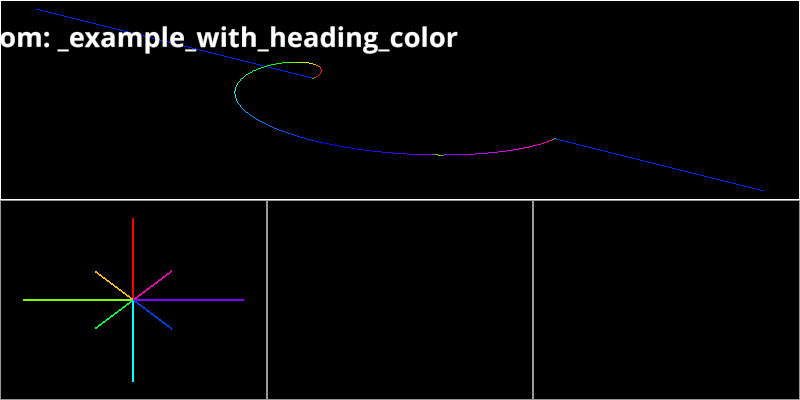

In [7]:
canvas
# canvas.show()

CanvasBackend(css_height='400px', css_width='1400px')
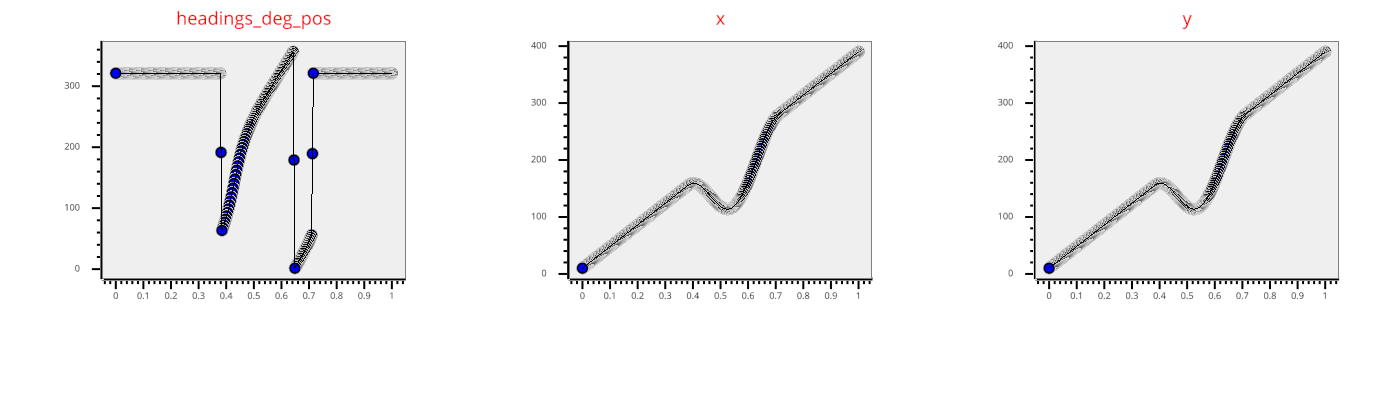

In [8]:
fig

In [ ]:
vertex_colors = legend_data_dict['vertex_colors']
Colormap(vertex_colors)


In [ ]:
canvas = CompassDemo()
canvas

# New Vertex color shader

In [ ]:
# canvas = scene.SceneCanvas(keys='interactive', size=(800, 400), show=True)

# canvas = CompassDemo(show=True)
canvas = InteractiveHeadingLine(show=True)
canvas


In [ ]:
canvas.show()